In [1]:
import numpy as np
import xobjects as xo
import xtrack as xt
import xpart as xp
import json
import pandas as pd
from cpymad.madx import Madx
import NAFFlib
from math import modf
from matplotlib import pyplot as plt
from scipy.stats import linregress
import math

In [22]:
i_mo = 0
p0c = 7000e9
normal_emitt_x = 3e-6 #m*rad
normal_emitt_y = 3e-6 #m*rad
N_particles = 11 
N=1000
n_turns= 1



ctx_cpu = xo.ContextCpu()
with open('hl_line.json', 'r') as fid:
        loaded_dct = json.load(fid)
line = xt.Line.from_dict(loaded_dct)
particle_0 = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=p0c, x=1e-3, y=1e-3)

line.vars['i_mo'] = i_mo
print(f"\n\nChanging Octupole Current, i_mo = {line.vars['i_mo']._get_value()}\n\n")
tracker_normal = xt.Tracker(_context=ctx_cpu, line=line)
ref = tracker_normal.find_closed_orbit(particle_ref = particle_0) 
print(f'\n\nref.x = {ref.x}, ref.y = {ref.y}, ref.zeta = {ref.zeta} \n\n')



tw_normal = tracker_normal.twiss(ref)
betx_at_ip3 = tw_normal['betx'][0]
sigma_x = np.sqrt(betx_at_ip3*normal_emitt_x/(particle_0.gamma0*particle_0.beta0))

print(f'\n\nBeta values at ip3, betx = {betx_at_ip3}')
print(f'\n\nSigma values, sigma_x = {sigma_x}')

#----closed orbit particle----------
p0_normal = ref 
#----particles to track----------
particles_x = xp.build_particles(_context=ctx_cpu,particle_ref=p0_normal,
                                     x=[mysigma*sigma_x[0] for mysigma in np.linspace(0.2,2.2,N_particles)])

print('method 1',particles_x.x)
if False:
    particles_x = xp.build_particles(_context=ctx_cpu,
                                   tracker=tracker_normal, particle_ref=p0_normal,
                                   zeta=0, delta=1e-10,
                                   x_norm=[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2], # in sigmas
                                   px_norm=[0,0,0,0,0,0,0,0,0,0,0], # in sigmas
                                   y_norm=[0,0,0,0,0,0,0,0,0,0,0], # in sigmas
                                   py_norm=[0,0,0,0,0,0,0,0,0,0,0], # in sigmas
                                   scale_with_transverse_norm_emitt=(3e-6, 3e-6)
                                   )
#assert on the phase, cosphi must be zero
#assert()
x0 = []
print('method 2',particles_x.x)
for ii in range(len(particles_x.x)):
    x0.append(particles_x.x[ii])
    print(particles_x.px[ii])

jx = np.zeros(N_particles)
x_prime_control = np.zeros(N_particles)
tg_phix = -tw_normal['alfx'][0]
phix = np.arctan(tg_phix)
for ii in range(N_particles):
    jx[ii] = x0[ii]*x0[ii]/(2*betx_at_ip3*np.cos(phix)*np.cos(phix))
    x_prime_control[ii] = (tw_normal['alfx'][0]*np.sqrt(2*jx[ii]/betx_at_ip3)*np.cos(phix))-(np.sqrt(2*jx[ii]/betx_at_ip3))*np.sin(phix)
print(x_prime_control)    
    

#-----tracking x direction------------------


my_result_x = {}
for ii in ['x','px','y','py','zeta','delta']:
    my_result_x[ii] = []


for ii in range(N):
    tracker_normal.track(particles_x, num_turns=n_turns,turn_by_turn_monitor=False)
    for jj in ['x','px','y','py','zeta','delta']:
        my_result_x[jj].append(getattr(particles_x,jj).copy())       
        
        
for jj in ['x','px','y','py','zeta','delta']:
        my_result_x[jj] = np.array(my_result_x[jj])



qx_part_x = []
qy_part_x = []

for ii in range(N_particles):
    
    qx_part_x.append(NAFFlib.get_tune(my_result_x['x'][:,ii]))
    qy_part_x.append(NAFFlib.get_tune(my_result_x['y'][:,ii]))


#x0 = np.array([mysigma*sigma_x[0] for mysigma in np.linspace(0.2,2.2,N_particles)]) 



Changing Octupole Current, i_mo = 0


generating ./85d3cd7fbc1a4853a32db979fd35fd05.c
the current directory is '/afs/cern.ch/user/a/afornara/simulations/sim_stud/git_postprocessing'
running build_ext
building '85d3cd7fbc1a4853a32db979fd35fd05' extension
gcc -pthread -B /home/afornara/py/2022_03_18/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/afornara/py/2022_03_18/miniconda/include -I/home/afornara/py/2022_03_18/miniconda/include -fPIC -O2 -isystem /home/afornara/py/2022_03_18/miniconda/include -fPIC -I/home/afornara/py/2022_03_18/miniconda/include/python3.9 -c 85d3cd7fbc1a4853a32db979fd35fd05.c -o ./85d3cd7fbc1a4853a32db979fd35fd05.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/afornara/py/2022_03_18/miniconda/compiler_compat -shared -Wl,-rpath,/home/afornara/py/2022_03_18/miniconda/lib -Wl,-rpath-link,/home/afornara/py/2022_03_18/miniconda/lib -L/home/afornara/py/2022_03_18/miniconda/lib -L/home/afornara/py/2022_

[2.09099412e-06 4.18198824e-06 6.27298236e-06 8.36397647e-06
 1.04549706e-05 1.25459647e-05 1.46369588e-05 1.67279529e-05
 1.88189471e-05 2.09099412e-05 2.30009353e-05]
m =  49436.8417286188 q =  0.3099999805880492


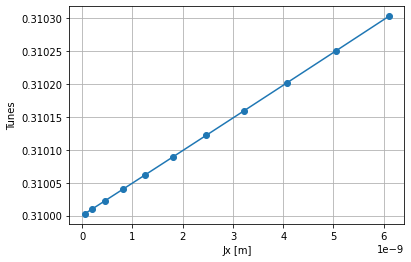

In [25]:
jx = np.zeros(N_particles)
x_prime_control = np.zeros(N_particles)
tg_phix = -tw_normal['alfx'][0]
phix = np.arctan(tg_phix)
for ii in range(N_particles):
    jx[ii] = x0[ii]*x0[ii]/(2*betx_at_ip3*np.cos(phix)*np.cos(phix))
    x_prime_control[ii] = 2.29567535*np.sqrt(2*jx[ii]/betx_at_ip3)


print(x_prime_control)
plt.plot(jx,qx_part_x,'-o');
plt.grid()
plt.ylabel('Tunes')
plt.xlabel('Jx [m]')


slope, intercept, r_value, p_value, std_err = linregress([jx[0],jx[6]],[qx_part_x[0],qx_part_x[6]])
print('m = ',slope,'q = ',intercept)

In [10]:
particles_x.x[0]

4.579335208914932e-05

In [11]:
x_prime_control

array([2.09099412e-06, 4.18198824e-06, 6.27298236e-06, 8.36397647e-06,
       1.04549706e-05, 1.25459647e-05, 1.46369588e-05, 1.67279529e-05,
       1.88189471e-05, 2.09099412e-05, 2.30009353e-05])